In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Apply matplotlib styles
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.style.use("ggplot")
plt.style.use("seaborn-v0_8-whitegrid")

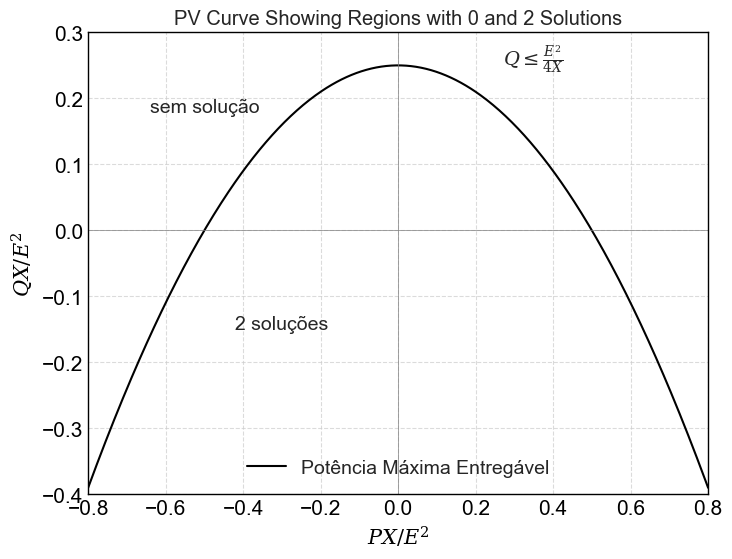

In [30]:
# Parameters
E = 1.05  # Swing bus voltage
X = 0.25  # Line reactance

# Range for normalized P (P * X / E^2)
P_normalized = np.linspace(-0.8, 0.8, 500)

# Calculate normalized Q using the maximum power transfer equation
Q_normalized = (1 - 4 * (P_normalized**2)) / 4

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(P_normalized, Q_normalized, color='black', label='Potência Máxima Entregável')

# Annotations for "0 solution" and "2 solutions" regions
plt.text(-0.5, 0.18, 'sem solução', fontsize=14, ha='center')
plt.text(-0.3, -0.15, '2 soluções', fontsize=14, ha='center')
plt.text(0.35, 0.25, r'$Q \leq \frac{E^2}{4X}$', fontsize=14, ha='center')

border_color = 'black'
linewidth = 1
ax.spines['top'].set_color(border_color)
ax.spines['bottom'].set_color(border_color)
ax.spines['left'].set_color(border_color)
ax.spines['right'].set_color(border_color)
ax.spines['top'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['right'].set_linewidth(linewidth)

# Display settings
plt.title('PV Curve Showing Regions with 0 and 2 Solutions')
plt.xlabel('$P X / E^2$',color='black',fontsize=15)
plt.ylabel('$Q X / E^2$',color='black',fontsize=15)
plt.tick_params(axis='both', colors='black', labelsize=15)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-0.4, 0.3)
plt.xlim(-0.8, 0.8)
plt.legend(fontsize=14)
plt.savefig('Plots/Pmaxentregavel.svg')
plt.show()


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Definindo os parâmetros do sistema
# E = 1.05  # Tensão da barra swing (ajuste conforme necessário)
# X = 0.25  # Reatância da linha (ajuste conforme necessário)
# Q = -0.05  # Potência reativa (ajuste conforme necessário)

# # Intervalo de valores para P
# P = np.linspace(0, E**2 / (2 * X), 500)  # Limite teórico para P com base na equação

# # Cálculo de V para cada P
# V_pos = np.sqrt((E**2 / 2) - Q * X + np.sqrt((E**4 / 4) - X**2 * P**2 - X * E**2 * Q))
# V_neg = np.sqrt((E**2 / 2) - Q * X - np.sqrt((E**4 / 4) - X**2 * P**2 - X * E**2 * Q))

# # Plotando a curva PV
# plt.figure(figsize=(8, 6))
# plt.plot(P, V_pos, label=r'$V_+$ (solução positiva)', color='b')
# plt.plot(P, V_neg, label=r'$V_-$ (solução negativa)', color='r', linestyle='--')

# # Configurando o gráfico
# plt.title('Curva PV para Análise de Estabilidade de Tensão')
# plt.xlabel('P (Potência Ativa)')
# plt.ylabel('V (Tensão)')
# plt.axhline(0, color='gray', linewidth=0.5)
# plt.axvline(0, color='gray', linewidth=0.5)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend()
# plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_35020\2050320504.py:12: RuntimeWarning: invalid value encountered in sqrt
  p = (-v**2 * tan_phi - v * np.sqrt(1 + tan_phi**2 - v**2)) / (1 + tan_phi**2)
C:\Users\david\AppData\Local\Temp\ipykernel_35020\2050320504.py:15: RuntimeWarning: invalid value encountered in sqrt
  p = (-v**2 * tan_phi + v * np.sqrt(1 + tan_phi**2 - v**2)) / (1 + tan_phi**2)


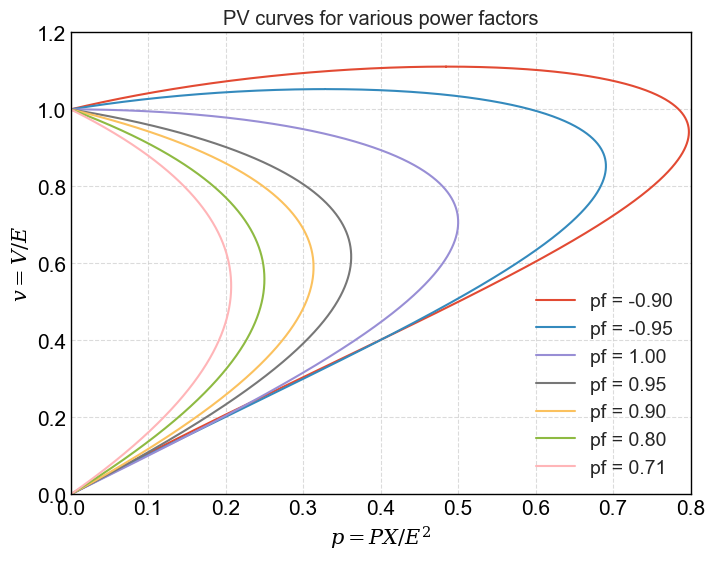

In [33]:
# Define constants
power_factors = [-0.90, -0.95, 1.00, 0.95, 0.90, 0.80, 0.7071]  # Power factors to plot
v_values_leading = np.linspace(1, 1.2, 1000000)  # Range for v in [1, vmax] for leading pf
v_values_lagging = np.linspace(0, 1.2, 1000000)  # Range for general case and lagging pf

# Function to calculate normalized power (p) based on voltage (v) and power factor (pf)
def calculate_p(v, pf, leading=False):
    phi = np.arccos(pf)  # Calculate angle from power factor
    tan_phi = np.tan(phi)
    if leading:
        # Leading power factor logic: p = (-v^2 tan φ - v sqrt(1 + tan^2 φ - v^2)) / (1 + tan^2 φ)
        p = (-v**2 * tan_phi - v * np.sqrt(1 + tan_phi**2 - v**2)) / (1 + tan_phi**2)
    else:
        # Lagging and other cases: p = (-v^2 tan φ + v sqrt(1 + tan^2 φ - v^2)) / (1 + tan^2 φ)
        p = (-v**2 * tan_phi + v * np.sqrt(1 + tan_phi**2 - v**2)) / (1 + tan_phi**2)
    return p

# Plot PV curves for different power factors
fig, ax = plt.subplots(figsize=(8, 6))
for pf in power_factors:
    if pf < 0:  # For leading power factors
        # Calculate for v in [1, vmax]
        p_values_segment1 = calculate_p(v_values_leading, pf, leading=True)
        # Calculate for v in [vmax, 0] using lagging formula
        p_values_segment2 = calculate_p(np.flip(v_values_lagging), pf, leading=False)
        
        # Combine both segments for complete curve
        p_values = np.concatenate((p_values_segment1, p_values_segment2))
        v_values = np.concatenate((v_values_leading, np.flip(v_values_lagging)))
    else:
        # General case for lagging or unity power factor
        p_values = calculate_p(v_values_lagging, pf, leading=False)
        v_values = v_values_lagging
    
    plt.plot(p_values, v_values, label=f'pf = {pf:.2f}')

border_color = 'black'
linewidth = 1
ax.spines['top'].set_color(border_color)
ax.spines['bottom'].set_color(border_color)
ax.spines['left'].set_color(border_color)
ax.spines['right'].set_color(border_color)
ax.spines['top'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['right'].set_linewidth(linewidth)

# Customize plot
plt.xlabel('$p = PX/E^2$',color='black',fontsize=15)
plt.ylabel('$v = V/E$',color='black',fontsize=15)
plt.tick_params(axis='both', colors='black', labelsize=15)
plt.ylim(0, 1.2)
plt.xlim(0, 0.8)
plt.legend(loc='lower right', fontsize= 14)
plt.title('PV curves for various power factors')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('Plots/CurvesPV.svg')
plt.show()


In [92]:
path = 'C:/Users/david/OneDrive/Desktop/TEST ORGANON/Otros casos/Sistemas Pequenhos/PVdata.csv'
dataPV = pd.read_csv(path, sep=';', header=1)
dataPV.iloc[0,0] = 'L=   0.000'
dataPV['lambda'] = dataPV['Case ID'].str.replace('L= ','').astype(float)

In [93]:
path = 'C:/Users/david/OneDrive/Desktop/TEST ORGANON/Otros casos/Sistemas Pequenhos/PVdatashunt1.csv'
dataPV2 = pd.read_csv(path, sep=';', header=1)
dataPV2.iloc[0,0] = 'L=   0.000'
dataPV2['lambda'] = dataPV2['Case ID'].str.replace('L= ','').astype(float)
path = 'C:/Users/david/OneDrive/Desktop/TEST ORGANON/Otros casos/Sistemas Pequenhos/PVdatashunt2.csv'
dataPV3 = pd.read_csv(path, sep=';', header=1)
dataPV3.iloc[0,0] = 'L=   0.000'
dataPV3['lambda'] = dataPV3['Case ID'].str.replace('L= ','').astype(float)

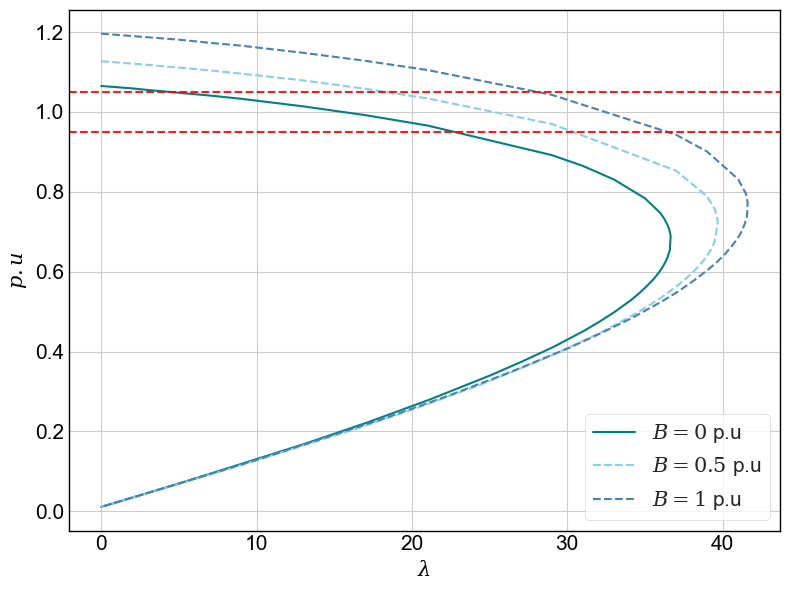

In [109]:
fig, ax = plt.subplots(figsize=(8, 6))
# Customize axes spines
border_color = 'black'
linewidth = 1
ax.spines['top'].set_color(border_color)
ax.spines['bottom'].set_color(border_color)
ax.spines['left'].set_color(border_color)
ax.spines['right'].set_color(border_color)
ax.spines['top'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['right'].set_linewidth(linewidth)

plt.plot(dataPV['lambda'], dataPV['V_2'], color='teal',  label=f'$B=0$ p.u')
# plt.plot(dataPV['lambda'], dataPV['V_1'], color='forestgreen',  label=f'$E$')
plt.plot(dataPV3['lambda'], dataPV3['V_2'], color='skyblue',linestyle='--',  label=f'$B=0.5$ p.u')
plt.plot(dataPV2['lambda'], dataPV2['V_2'], color='steelblue',linestyle='--',  label=f'$B=1$ p.u')
plt.axhline(0.95, color='red', linestyle='--', alpha=0.9)
plt.axhline(1.05, color='red', linestyle='--', alpha=0.9)

# Setting titles and labels
plt.title("")
plt.legend(loc='lower right', title='', fontsize=15, title_fontsize=12, frameon=True)
plt.xlabel(r'$\lambda$', color='black',fontsize=15)
plt.ylabel("$p.u$", color='black',fontsize=15)
plt.tick_params(axis='x', colors='black', labelsize=15)
plt.tick_params(axis='y', colors='black', labelsize=15)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.savefig('Plots/CPF.svg')
plt.tight_layout()  # Adjust layout for better fit
plt.show()
